In [14]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.ascii
import pandas as pd
import astropy.constants as ac
import astropy.units as u

In [15]:
#give colab access to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Planetary parameters of HD 189733 b computed from Exofast MCMC
data = {'Planet': ['HD 189733 b'],
        'Mass (Mj)': [1.129400],
        'Mass Uncerainty (Mj)':[0.050616],
        'Radius (Rj)': [1.176305],
        'Radius Uncertainty (Rj)': [0.044743],
        'Density (cgs)': [0.861635],
        'Density Uncertainty (cgs)': [0.108704]}

df = pd.DataFrame(data)

df

,Planet,Mass (Mj),Mass Uncerainty (Mj),Radius (Rj),Radius Uncertainty (Rj),Density (cgs),Density Uncertainty (cgs)
0,HD 189733 b,1.1294,0.050616,1.176305,0.044743,0.861635,0.108704


In [17]:
# Create a table of exoplanets to compare HD 189733 b to

tab = astropy.io.ascii.read("/content/drive/My Drive/Colab Notebooks/PS_2025.02.18_15.12.53.csv")
tab

pl_name,hostname,default_flag,discoverymethod,pl_radj,pl_massj,pl_dens
str29,str27,int64,str29,float64,float64,float64
11 Com b,11 Com,1,Radial Velocity,--,--,--
11 UMi b,11 UMi,1,Radial Velocity,--,--,--
14 And b,14 And,1,Radial Velocity,--,--,--
14 Her b,14 Her,1,Radial Velocity,--,8.053,--
16 Cyg B b,16 Cyg B,1,Radial Velocity,--,--,--
17 Sco b,17 Sco,1,Radial Velocity,--,--,--
18 Del b,18 Del,1,Radial Velocity,--,--,--
1RXS J160929.1-210524 b,1RXS J160929.1-210524,1,Imaging,--,8.0,--
24 Boo b,24 Boo,1,Radial Velocity,--,--,--


In [18]:

# Convert the Astropy table to a Pandas DataFrame for easier handling of NaN values
tab_df = tab.to_pandas()

# Remove rows with any NaN values
tab_df_new = tab_df.dropna()

# Display the cleaned DataFrame
tab_df_new


,pl_name,hostname,default_flag,discoverymethod,pl_radj,pl_massj,pl_dens
35,55 Cnc e,55 Cnc,1,Radial Velocity,0.167,0.02514,6.660
78,BD-14 3065 b,BD-14 3065 A,1,Transit,1.926,12.37000,2.150
90,CoRoT-1 b,CoRoT-1,1,Transit,1.490,1.03000,0.380
91,CoRoT-10 b,CoRoT-10,1,Transit,0.970,2.75000,3.700
92,CoRoT-11 b,CoRoT-11,1,Transit,1.430,2.33000,0.990
...,...,...,...,...,...,...,...
5774,Wolf 503 b,Wolf 503,1,Transit,0.182,0.01973,4.030
5776,XO-2 N b,XO-2 N,1,Transit,0.993,0.56600,0.715
5781,XO-5 b,XO-5,1,Transit,1.140,1.19000,1.060
5782,XO-6 b,XO-6,1,Transit,2.070,4.40000,0.620


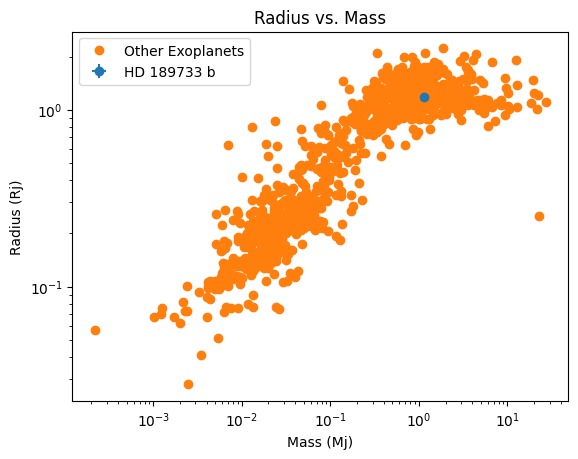

In [19]:
# Plotting HD 189733 b parameters alongside other similar planets
plt.title("Radius vs. Mass")
plt.errorbar(df['Mass (Mj)'], df['Radius (Rj)'], xerr=df['Mass Uncerainty (Mj)'], yerr=df['Radius Uncertainty (Rj)'], fmt='o', label='HD 189733 b')
plt.plot(tab_df_new['pl_massj'], tab_df_new['pl_radj'], 'o', label='Other Exoplanets')
plt.xlabel("Mass (Mj)")
plt.ylabel("Radius (Rj)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

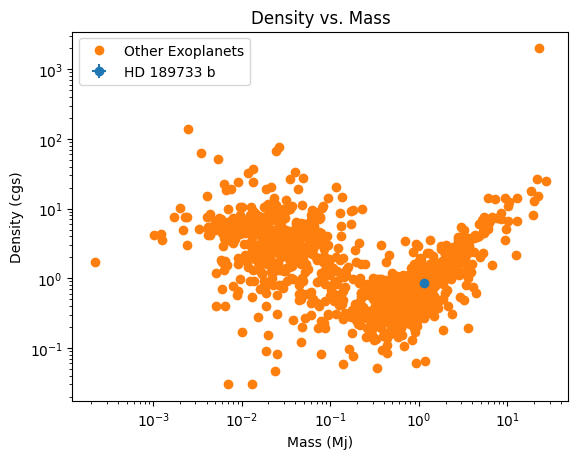

In [20]:
# Plotting HD 189733 b parameters alongside other similar planets
plt.title("Density vs. Mass")
plt.errorbar(df['Mass (Mj)'], df['Density (cgs)'], xerr=df['Mass Uncerainty (Mj)'], yerr=df['Radius Uncertainty (Rj)'], fmt='o', label='HD 189733 b')
plt.plot(tab_df_new['pl_massj'], tab_df_new['pl_dens'], 'o', label='Other Exoplanets')
plt.xlabel("Mass (Mj)")
plt.ylabel("Density (cgs)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

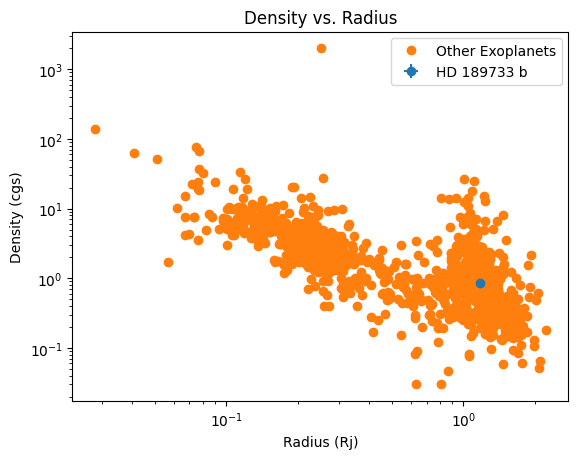

In [21]:
# Plotting HD 189733 b parameters alongside other similar planets
plt.title("Density vs. Radius")
plt.errorbar(df['Radius (Rj)'], df['Density (cgs)'], xerr=df['Mass Uncerainty (Mj)'], yerr=df['Radius Uncertainty (Rj)'], fmt='o', label='HD 189733 b')
plt.plot(tab_df_new['pl_radj'], tab_df_new['pl_dens'], 'o', label='Other Exoplanets')
plt.xlabel("Radius (Rj)")
plt.ylabel("Density (cgs)")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
# Computing mass and radius ratios

Mass = df['Mass (Mj)']
Radius = df['Radius (Rj)']
MassErr = df['Mass Uncerainty (Mj)']
RmassErr = df['Radius Uncertainty (Rj)']

Mratio = Mass * ac.M_jup/ac.M_earth
Rratio = Radius * ac.R_jup/ac.R_earth
Merr = MassErr * ac.M_jup/ac.M_earth
Rerr = RmassErr * ac.R_jup/ac.R_earth
print("Mass ratio is: ", Mratio.item(), "+-", Merr.item())
print()
print("Radius ratio is: ", Rratio.item(), "+-", Rerr.item())
